In [1]:
# this lets us use the figures interactively
%matplotlib notebook

import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
from cartopy import config
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.ion() # make the plotting interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)

In [2]:
# load the bedrock geology layer of Northern Ireland
bedrocks = gpd.read_file('data_files/bedrocks.shp')

In [3]:
print(bedrocks.head())

   MSLINK_0   LEX                                       LEXICONDES  \
0      3678  SHRD                          SHANE'S HILL RHYODACITE   
1      3678  SHRD                          SHANE'S HILL RHYODACITE   
2      3659   UIG            UNNAMED IGNEOUS INTRUSION, PALAEOGENE   
3      3663   TPR  TEMPLEPATRICK RHYOLITE [OBSOLETE NAME AND CODE]   
4      3659   UIG            UNNAMED IGNEOUS INTRUSION, PALAEOGENE   

                      ROCKDESC AGE  BGSREF   LEX_ROCK        Bedrocks  Code  \
0  RHYODACITE             1BAB  GP     703  SHRD-RHYD  ACID VOLCANICS     5   
1  RHYODACITE             1BAB  GP     703  SHRD-RHYD  ACID VOLCANICS     5   
2  RHYOLITE               1BAA   G     703   UIG-RHYO  ACID VOLCANICS     5   
3  RHYOLITE               1BAA  GP     703   TPR-RHYO  ACID VOLCANICS     5   
4  RHYOLITE               1BAA   G     703   UIG-RHYO  ACID VOLCANICS     5   

            area    perimeter  \
0  417149.808578  2836.704387   
1  888522.336647  3820.140901   
2   5

<IPython.core.display.Javascript object>


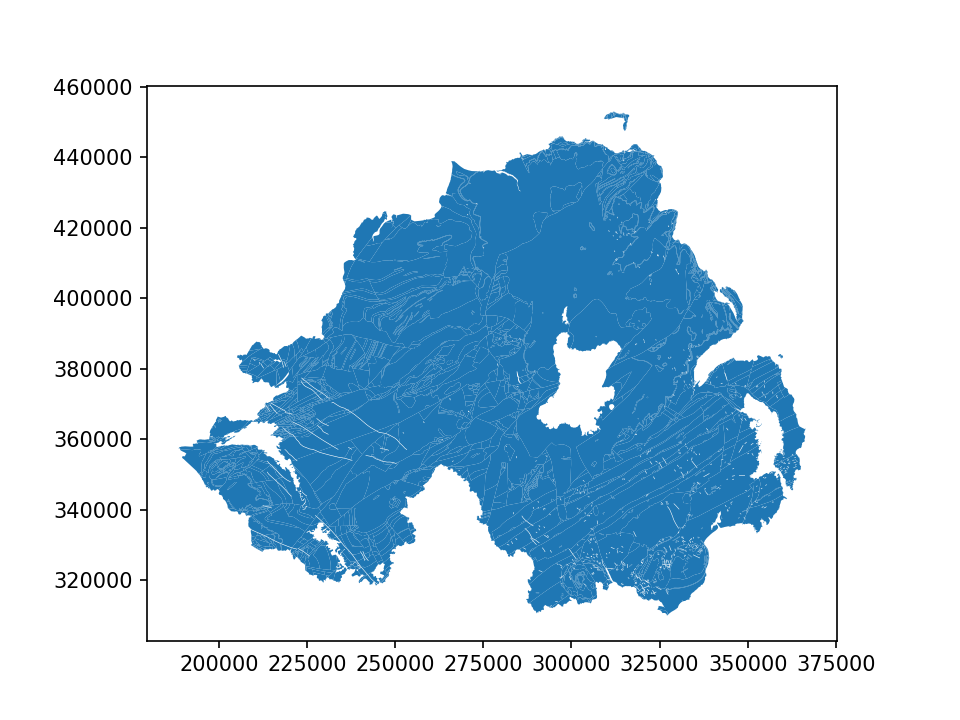

<AxesSubplot:>

In [4]:
bedrocks.plot()

<IPython.core.display.Javascript object>


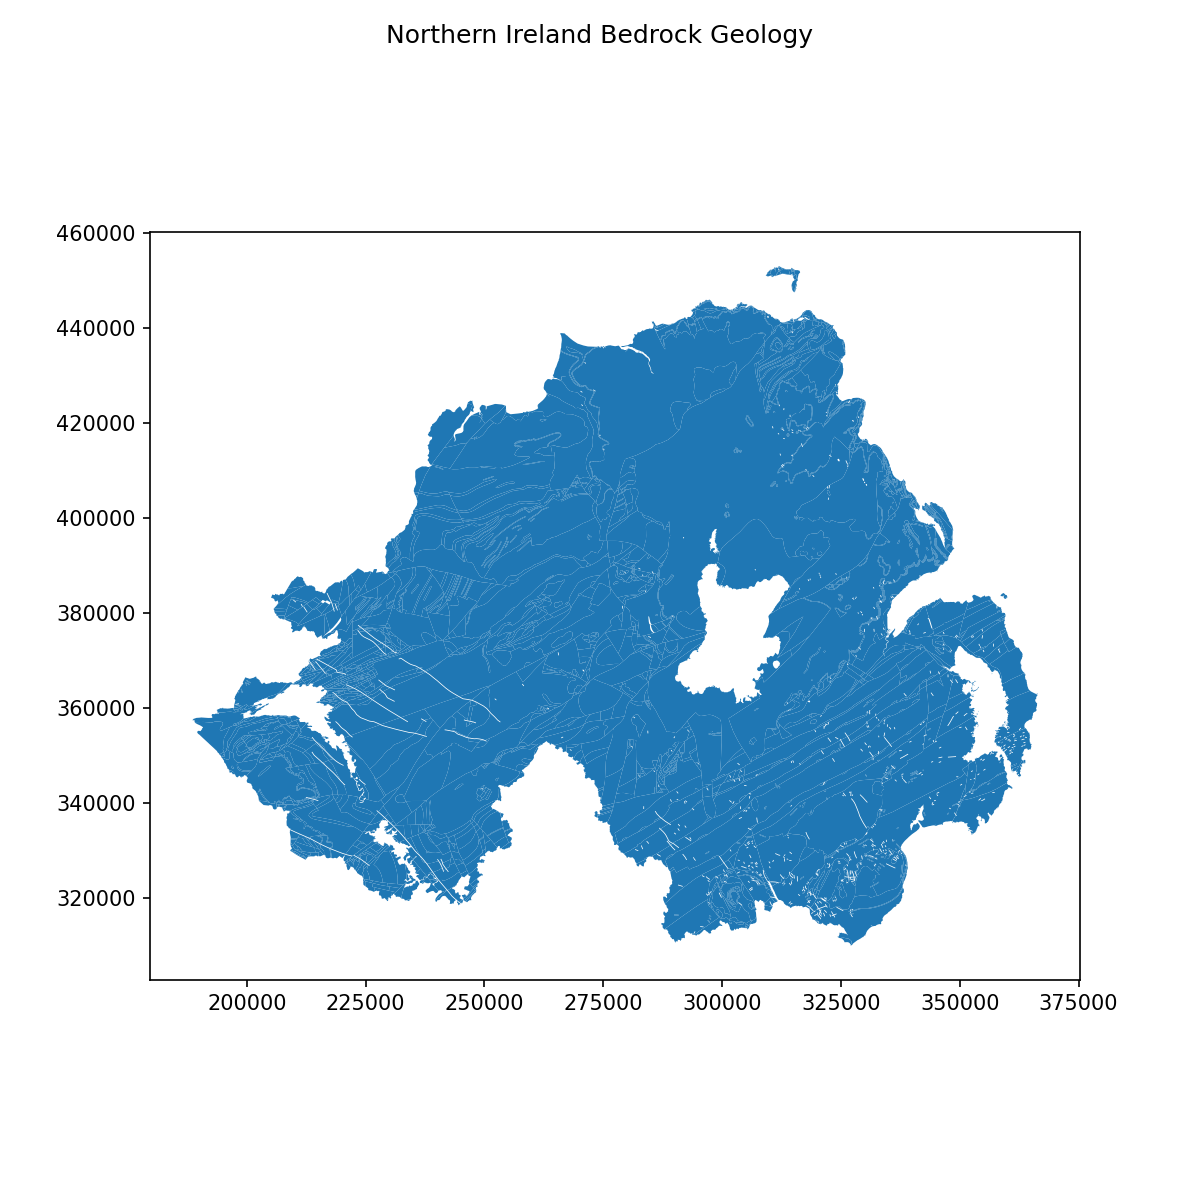

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


In [5]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = bedrocks.plot(axes=ax)
f.suptitle('Northern Ireland Bedrock Geology')
plt.show()

In [6]:
bedrocks

,MSLINK_0,LEX,LEXICONDES,ROCKDESC,AGE,BGSREF,LEX_ROCK,Bedrocks,Code,area,perimeter,geometry
0,3678,SHRD,SHANE'S HILL RHYODACITE,RHYODACITE 1BAB,GP,703,SHRD-RHYD,ACID VOLCANICS,5,4.171498e+05,2836.704387,"POLYGON ((306027.195 353143.694, 306147.747 35..."
1,3678,SHRD,SHANE'S HILL RHYODACITE,RHYODACITE 1BAB,GP,703,SHRD-RHYD,ACID VOLCANICS,5,8.885223e+05,3820.140901,"POLYGON ((305968.411 353228.661, 306164.238 35..."
2,3659,UIG,"UNNAMED IGNEOUS INTRUSION, PALAEOGENE",RHYOLITE 1BAA,G,703,UIG-RHYO,ACID VOLCANICS,5,5.596615e+04,884.183036,"POLYGON ((313527.461 407868.052, 313589.811 40..."
3,3663,TPR,TEMPLEPATRICK RHYOLITE [OBSOLETE NAME AND CODE],RHYOLITE 1BAA,GP,703,TPR-RHYO,ACID VOLCANICS,5,9.072705e+04,1523.863465,"POLYGON ((325888.569 386805.060, 325974.534 38..."
4,3659,UIG,"UNNAMED IGNEOUS INTRUSION, PALAEOGENE",RHYOLITE 1BAA,G,703,UIG-RHYO,ACID VOLCANICS,5,1.247527e+05,1341.894228,"POLYGON ((311478.844 406950.057, 311603.542 40..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2258,3602,SSG,SHERWOOD SANDSTONE GROUP,SANDSTONE 3D00,PU,302,SSG-SDST,SANDSTONE,8,1.299333e+08,92030.431145,"POLYGON ((275379.821 345384.076, 275448.622 34..."
2259,3689,BELF,BELFAST GROUP,"BRECCIA AND SANDSTONE, INTERBEDDED (for use on...",PU,913,BELF-BRSS,SANDSTONE,8,2.949386e+05,3532.001141,"POLYGON ((344783.212 372882.594, 344956.610 37..."
2260,3581,BYDN,BALLYDURNIAN BRECCIA FORMATION,"BRECCIA AND SANDSTONE, INTERBEDDED (for use on...",C,226,BYDN-BRSS,SANDSTONE,8,3.032128e+05,3639.166618,"POLYGON ((310257.133 438486.495, 310370.824 43..."
2261,0,None,None,None,None,0,None,SANDSTONE,8,1.311301e+01,13.706187,"POLYGON ((262865.226 428766.507, 262868.173 42..."


In [7]:
bedrocks.head

<bound method NDFrame.head of       MSLINK_0   LEX                                       LEXICONDES  \
0         3678  SHRD                          SHANE'S HILL RHYODACITE   
1         3678  SHRD                          SHANE'S HILL RHYODACITE   
2         3659   UIG            UNNAMED IGNEOUS INTRUSION, PALAEOGENE   
3         3663   TPR  TEMPLEPATRICK RHYOLITE [OBSOLETE NAME AND CODE]   
4         3659   UIG            UNNAMED IGNEOUS INTRUSION, PALAEOGENE   
...        ...   ...                                              ...   
2258      3602   SSG                         SHERWOOD SANDSTONE GROUP   
2259      3689  BELF                                    BELFAST GROUP   
2260      3581  BYDN                   BALLYDURNIAN BRECCIA FORMATION   
2261         0  None                                             None   
2262         0  None                                             None   

                                               ROCKDESC   AGE  BGSREF  \
0                   

In [8]:
bedrocks.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [9]:
bedrocks.columns

Index(['MSLINK_0', 'LEX', 'LEXICONDES', 'ROCKDESC', 'AGE', 'BGSREF',
       'LEX_ROCK', 'Bedrocks', 'Code', 'area', 'perimeter', 'geometry'],
      dtype='object')

In [10]:
rocks = bedrocks['Bedrocks'].tolist() # Get a list of a particular column (DERMOT)
print(rocks)

['ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', '

In [11]:
bedrocks['Bedrocks'].value_counts()

LIMESTONE                 492
MUDSTONE                  490
SANDSTONE                 346
BASALT                    343
GRANITE                   184
LITHIC ARENITE            174
PSAMMITE & Semi-Pelite    139
CONGLOMERATE               41
ACID VOLCANICS             24
ANDESITE                   18
GABBRO                     12
Name: Bedrocks, dtype: int64

In [12]:
bedrocks['Bedrocks'].value_counts(normalize=True)

LIMESTONE                 0.217411
MUDSTONE                  0.216527
SANDSTONE                 0.152894
BASALT                    0.151569
GRANITE                   0.081308
LITHIC ARENITE            0.076889
PSAMMITE & Semi-Pelite    0.061423
CONGLOMERATE              0.018118
ACID VOLCANICS            0.010605
ANDESITE                  0.007954
GABBRO                    0.005303
Name: Bedrocks, dtype: float64

In [13]:
bedrocks['Bedrocks'].describe()

count          2263
unique           11
top       LIMESTONE
freq            492
Name: Bedrocks, dtype: object

In [14]:
# load the radon data of Northern Ireland
radon = gpd.read_file('data_files/RadonNI.shp')

In [15]:
radon.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich